In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime
import seaborn as sns

In [11]:
canucks = pd.read_csv('../data/canucks/canucks_results.csv')

In [12]:
canucks

,Unnamed: 0,GP,Date,Unnamed: 2,Opponent,GF,GA,Unnamed: 6,Unnamed: 7,W,L,OL,Streak,Att.,LOG,Notes,Capacity,Attendance Ratio,Polarized Sentiment Ratio
0,0,1,2018-10-03 00:00:00+00:00,Home,Calgary Flames,5,2,W,NaN,1,0,0,W 1,18870,2:31,NaN,18910,0.997885,0.000000
1,1,2,2018-10-06 00:00:00+00:00,@,Calgary Flames,4,7,L,NaN,1,1,0,L 1,18688,2:39,NaN,19289,0.968842,0.615385
2,2,3,2018-10-09 00:00:00+00:00,@,Carolina Hurricanes,3,5,L,NaN,1,2,0,L 2,11932,2:35,NaN,18680,0.638758,1.000000
3,3,4,2018-10-11 00:00:00+00:00,@,Tampa Bay Lightning,4,1,W,NaN,2,2,0,W 1,19092,2:23,NaN,19092,1.000000,0.666667
4,4,5,2018-10-13 00:00:00+00:00,@,Florida Panthers,3,2,W,NaN,3,2,0,W 2,11953,2:32,NaN,19250,0.620935,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,78,2019-03-28 00:00:00+00:00,Home,Los Angeles Kings,3,2,W,SO,33,35,10,W 1,18524,2:38,NaN,18910,0.979588,0.703297
78,78,79,2019-03-30 00:00:00+00:00,Home,Dallas Stars,3,2,W,SO,34,35,10,W 2,18663,2:42,NaN,18910,0.986938,0.735294
79,79,80,2019-04-02 00:00:00+00:00,Home,San Jose Sharks,4,2,W,NaN,35,35,10,W 3,18524,2:22,NaN,18910,0.979588,0.724359
80,80,81,2019-04-04 00:00:00+00:00,@,Nashville Predators,2,3,L,NaN,35,36,10,L 1,17669,2:24,NaN,17113,1.000000,0.694656


In [13]:
canucks['Date'] = pd.to_datetime(canucks['Date'])

In [14]:
canucks['Unnamed: 2'] = canucks['Unnamed: 2'].replace('@', 'Away')

In [15]:
canucks.rename(columns={'Unnamed: 2': 'Home/Away'}, inplace=True)

# Attendance

C:\Users\mitch\Anaconda3\lib\site-packages\seaborn\relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)
C:\Users\mitch\Anaconda3\lib\site-packages\seaborn\relational.py:915: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


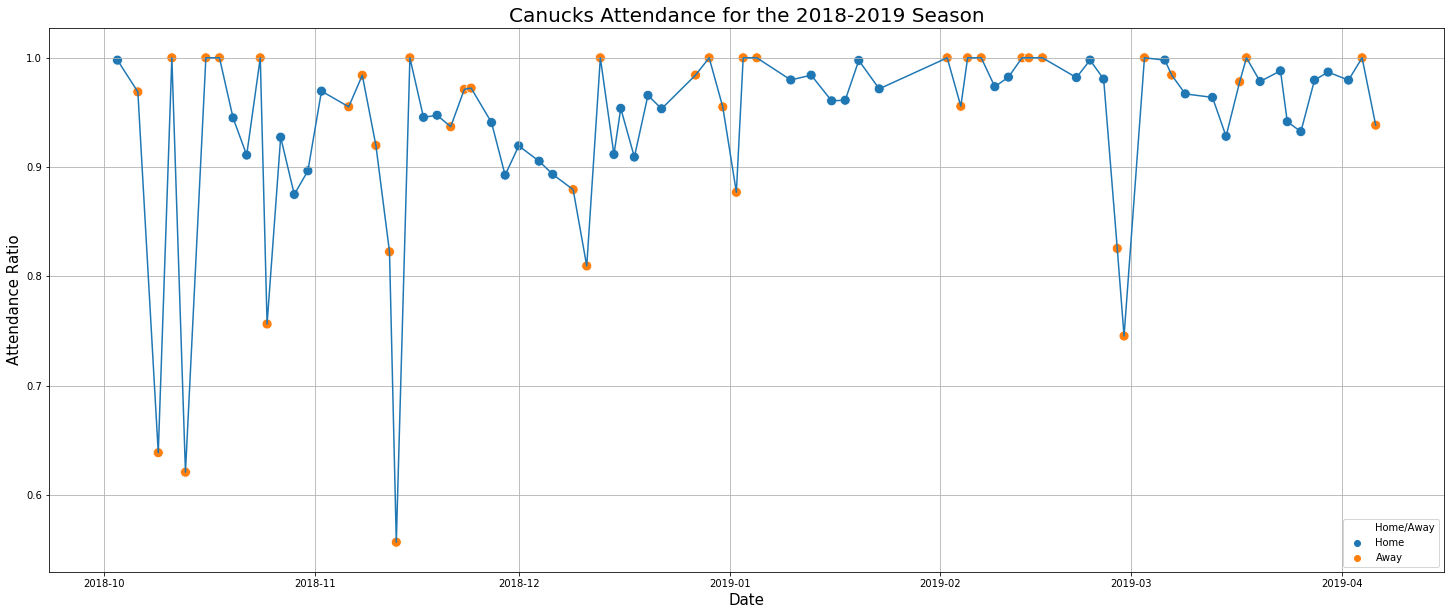

In [16]:
#raptors
fig, ax = plt.subplots(figsize=(25,10))
sns.lineplot(x = 'Date', y = 'Attendance Ratio', data=canucks)
sns.scatterplot(x = 'Date', y = 'Attendance Ratio', data=canucks, hue='Home/Away', s=100, hue_order=['Home', 'Away'])
plt.title('Canucks Attendance for the 2018-2019 Season', fontsize='20')
plt.xlabel('Date', fontsize='15')
plt.ylabel('Attendance Ratio', fontsize='15')
ax.legend(loc='lower right')
plt.grid()

fig.savefig('../data/canucks/canucks_201819_attendance_graph.png')

# Polarized Sentiment Distribution

In [17]:
def polarized_graph(team_df, team_name):
    fig, ax = plt.subplots(figsize=(25,10))
    sns.lineplot(x = 'Date', y = 'Polarized Sentiment Ratio', data=team_df, marker='o', color='blue')
    plt.axhline(0.5, color='black')
    plt.title(f'{team_name} Sentiment for the 2018-2019 Season', fontsize='20')
    plt.xlabel('Date', fontsize='15')
    plt.ylabel('Polarized Sentiment Ratio', fontsize='15')
    plt.grid()
    fig.savefig(f'../Presentation/{team_name}_sentiment.png')

In [18]:
canucks

,Unnamed: 0,GP,Date,Home/Away,Opponent,GF,GA,Unnamed: 6,Unnamed: 7,W,L,OL,Streak,Att.,LOG,Notes,Capacity,Attendance Ratio,Polarized Sentiment Ratio
0,0,1,2018-10-03 00:00:00+00:00,Home,Calgary Flames,5,2,W,NaN,1,0,0,W 1,18870,2:31,NaN,18910,0.997885,0.000000
1,1,2,2018-10-06 00:00:00+00:00,Away,Calgary Flames,4,7,L,NaN,1,1,0,L 1,18688,2:39,NaN,19289,0.968842,0.615385
2,2,3,2018-10-09 00:00:00+00:00,Away,Carolina Hurricanes,3,5,L,NaN,1,2,0,L 2,11932,2:35,NaN,18680,0.638758,1.000000
3,3,4,2018-10-11 00:00:00+00:00,Away,Tampa Bay Lightning,4,1,W,NaN,2,2,0,W 1,19092,2:23,NaN,19092,1.000000,0.666667
4,4,5,2018-10-13 00:00:00+00:00,Away,Florida Panthers,3,2,W,NaN,3,2,0,W 2,11953,2:32,NaN,19250,0.620935,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,78,2019-03-28 00:00:00+00:00,Home,Los Angeles Kings,3,2,W,SO,33,35,10,W 1,18524,2:38,NaN,18910,0.979588,0.703297
78,78,79,2019-03-30 00:00:00+00:00,Home,Dallas Stars,3,2,W,SO,34,35,10,W 2,18663,2:42,NaN,18910,0.986938,0.735294
79,79,80,2019-04-02 00:00:00+00:00,Home,San Jose Sharks,4,2,W,NaN,35,35,10,W 3,18524,2:22,NaN,18910,0.979588,0.724359
80,80,81,2019-04-04 00:00:00+00:00,Away,Nashville Predators,2,3,L,NaN,35,36,10,L 1,17669,2:24,NaN,17113,1.000000,0.694656


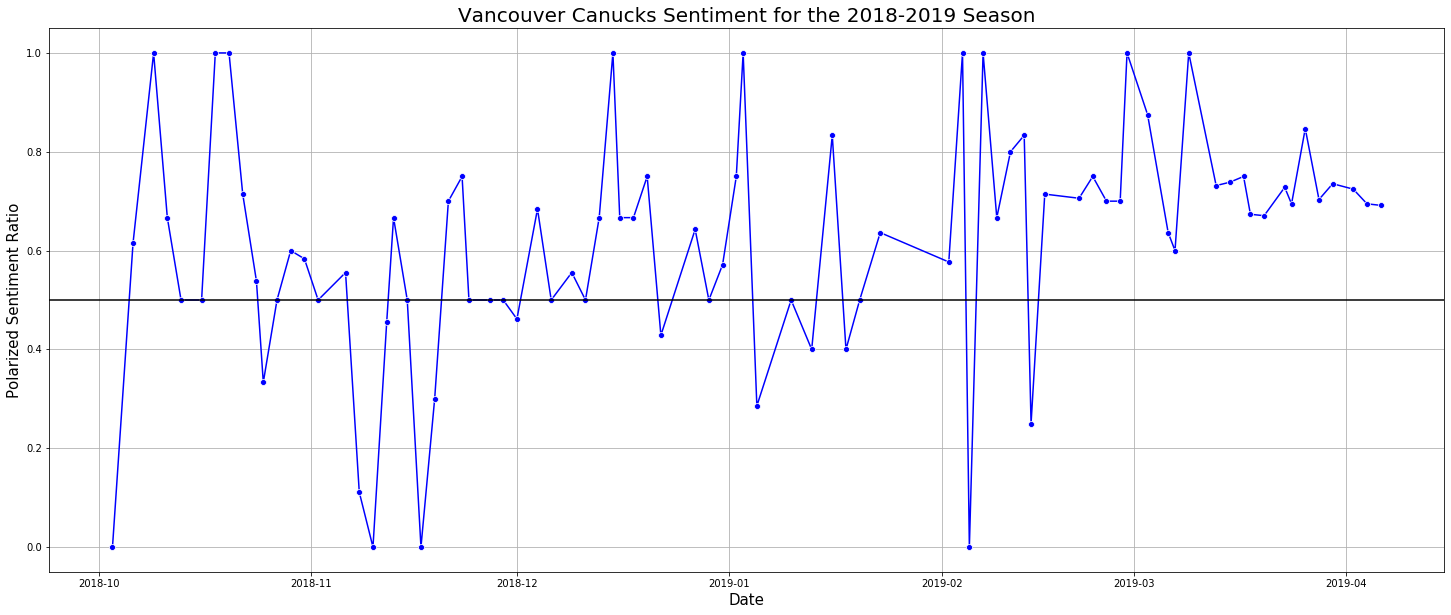

In [19]:
polarized_graph(canucks, 'Vancouver Canucks')

# Results Graph

In [22]:
def results_graph(team_df, team_name):
    fig, ax = plt.subplots(figsize=(25,10))
    sns.scatterplot(x = 'Polarized Sentiment Ratio', y = 'Attendance Ratio', data=team_df, marker='o', color='blue')
    plt.title(f'{team_name} Attendance as a function of Sentiment', fontsize='20')
    plt.xlabel('Polarized Sentiment Ratio', fontsize='15')
    plt.ylabel('Attendance Ratio', fontsize='15')
    plt.grid()
    fig.savefig(f'../Presentation/{team_name}_results.png')

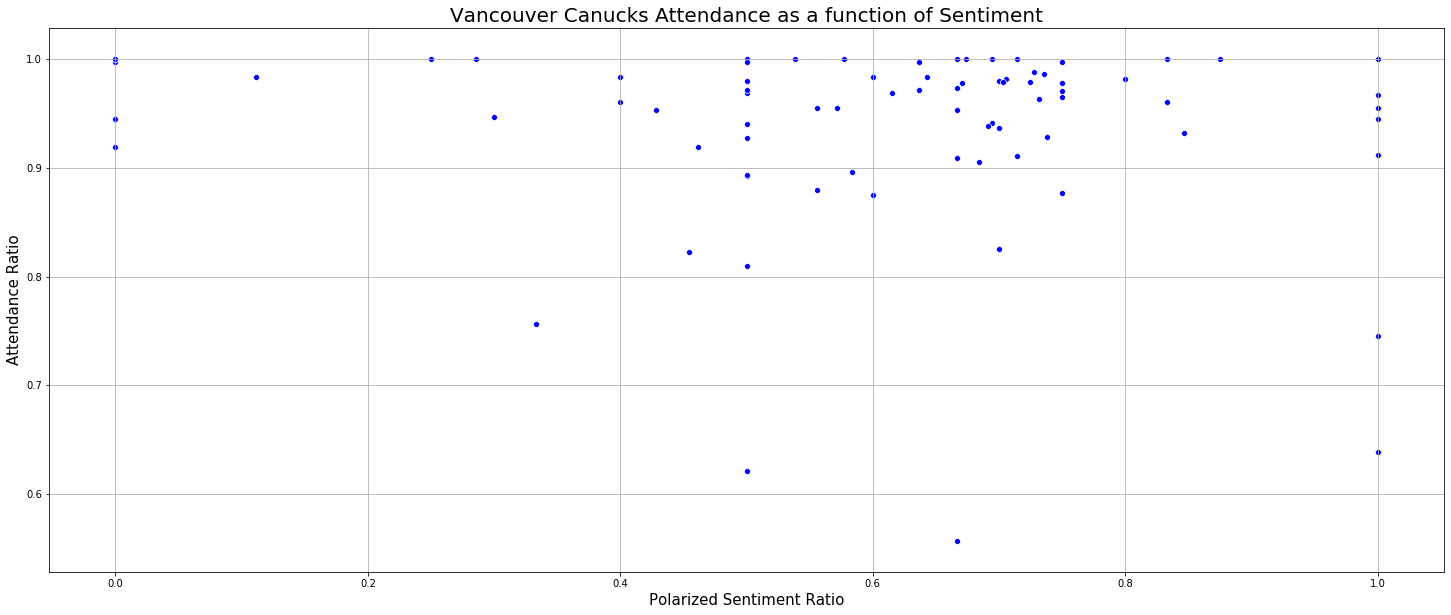

In [23]:
results_graph(canucks, 'Vancouver Canucks')